Problem 4-3 \
Assignment 3 \
\
group members:
1) Shuhan Xiao (Uni-id: kg410 Matrikelnr.: 3160697), 
2) Klaus Kades (Uni-id: fw448 Matrikelnr.: 3408463), 
3) Lucas-Raphael Müller (Uni-id: al413 Matrikelnr.: 3205638), 
4) Melanie Schellenberg (Uni-id: qh400 Matrikelnr.: 3146390)

In [3]:
# Install a pip package in the current Jupyter kernel
! pip install numpy pandas networkx matplotlib powerlaw

In [15]:
import pandas as pd
import networkx as nx
import numpy as np

path = '/workplace/CNA/Complex-Network-Analysis-Exercises/assignment-4/facebook-links.txt.anon'
data = pd.read_csv(path, delimiter='\t')
data= data[['1', '2']]
#remove time stamp
print(data.head())

   1  2
0  1  3
1  1  4
2  1  5
3  1  6
4  1  7


In [16]:
def generate_plot_graph2(data, plot=True):
    g=nx.from_pandas_edgelist(data,source='1', target='2', create_using=nx.DiGraph())
    print(len(g.edges))
    g=g.to_undirected(reciprocal=False, as_view=False)

    #control to not having multiple edges
    for node in g.nodes(): 
        # We look for adjacent nodes
        for adj_node in g[node]: 
            # If our graph has several edges from the first to the adjacent node
            if len(g[node][adj_node]) > 1: 
                print(node, adj_node)

    if plot==True:
        pos = nx.spring_layout(g, seed=1)
        nx.draw_networkx_edges(g, pos=pos)

    return g

In [17]:
g = generate_plot_graph2(data, plot=False)

1545685


1. max_diameter 63392
2. ID highest degree 2331 with value 1098
3. number of triangles is 3501542.0
4. average clustering is 0.22099367691190397
Calculating best minimal value for power law fit
5. power-law exponent is 4.438180320754116


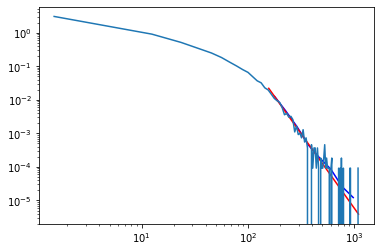

In [18]:
import powerlaw

max_diameter = len(max(nx.connected_components(g)))

print(f'1. max_diameter {max_diameter}')

current_max=0
current_id=0
degrees=[]
for id, node in enumerate(g.nodes):
    degrees.append(g.degree(node))
    if g.degree(node)>current_max:
        current_max =g.degree(node)
        current_id=id
print(f'2. ID highest degree {current_id} with value {current_max}')


triangle = nx.triangles(g)
amount_triangles=sum(triangle.values())/3
print(f'3. number of triangles is {amount_triangles}')

average_clustering=nx.average_clustering(g)
print(f'4. average clustering is {average_clustering}')


fit = powerlaw.Fit(degrees)
print(f'5. power-law exponent is {fit.alpha}')
fig1=fit.plot_pdf(color='b')
fit.power_law.plot_pdf(color='r', ax=fig1)
hist, bin_edges = np.histogram(degrees, bins=100, density=True)
bin_edges
#normalization factor was estiamted 
factor = 8**2
fig1.plot(bin_edges[:-1]+0.5, factor*hist)